In [86]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [87]:
adder = QuantumCircuit(13, name='adder')

adder.cx(2,11)
adder.cx(5,11)
adder.ccx(2,5,6)

adder.barrier()

adder.cx(1,10)
adder.cx(4,10)
adder.cx(6,10)
adder.ccx(1,4,7)
adder.ccx(1,6,7)
adder.ccx(4,6,7)

adder.barrier()

adder.cx(0,9)
adder.cx(3,9)
adder.cx(7,9)

adder.ccx(0,3,8)
adder.ccx(0,7,8)
adder.ccx(3,7,8)


#adder.draw(justify='none')

In [88]:
adderr = QuantumCircuit(13, name='adder_reverse')

adderr.ccx(3,7,8)
adderr.ccx(0,7,8)
adderr.ccx(0,3,8)
adderr.cx(7,9)
adderr.cx(3,9)
adderr.cx(0,9)

adderr.ccx(4,6,7)
adderr.ccx(1,6,7)
adderr.ccx(1,4,7)
adderr.cx(6,10)
adderr.cx(4,10)
adderr.cx(1,10)

adderr.ccx(2,5,6)
adderr.cx(5,11)
adderr.cx(2,11)

#adderr.draw()

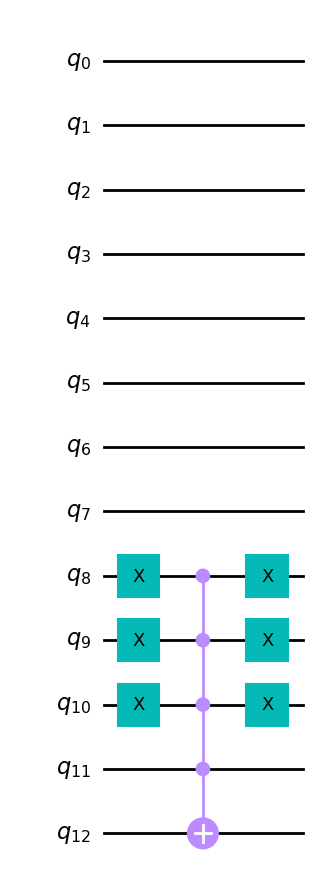

In [89]:
oracle = QuantumCircuit(13, name='oracle')

oracle.x(8)
oracle.x(9)
oracle.x(10)
#oracle.x(11)

oracle.mcx([8,9,10,11],12)

oracle.x(8)
oracle.x(9)
oracle.x(10)
#oracle.x(11)


oracle.draw()

In [90]:
diffuser = QuantumCircuit(13, name='diffuser')

diffuser.h([0,1,2,3,4,5])
diffuser.x([0,1,2,3,4,5])
    
diffuser.mcx([0,1,2,3,4,5], 12)

diffuser.x([0,1,2,3,4,5])   
diffuser.h([0,1,2,3,4,5])


#diffuser.draw()

In [91]:
from qiskit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(13, 'q')
cr = ClassicalRegister(6, 'c')
grovercircuit = QuantumCircuit(qr, cr)

iterations = 4

grovercircuit.x(12)
grovercircuit.h(12)

grovercircuit.h(0)
grovercircuit.h(1)
grovercircuit.h(2)
grovercircuit.h(3)
grovercircuit.h(4)
grovercircuit.h(5)

grovercircuit.barrier()

for i in range(iterations):
    grovercircuit.append(adder, [0,1,2,3,4,5,6,7,8,9,10,11,12])
    grovercircuit.append(oracle, [0,1,2,3,4,5,6,7,8,9,10,11,12])
    grovercircuit.append(adderr, [0,1,2,3,4,5,6,7,8,9,10,11,12])
    grovercircuit.append(diffuser, [0,1,2,3,4,5,6,7,8,9,10,11,12])


grovercircuit.measure([qr[0], qr[1], qr[2], qr[3], qr[4], qr[5]], [cr[0], cr[1], cr[2], cr[3], cr[4], cr[5]])

#grovercircuit.draw()

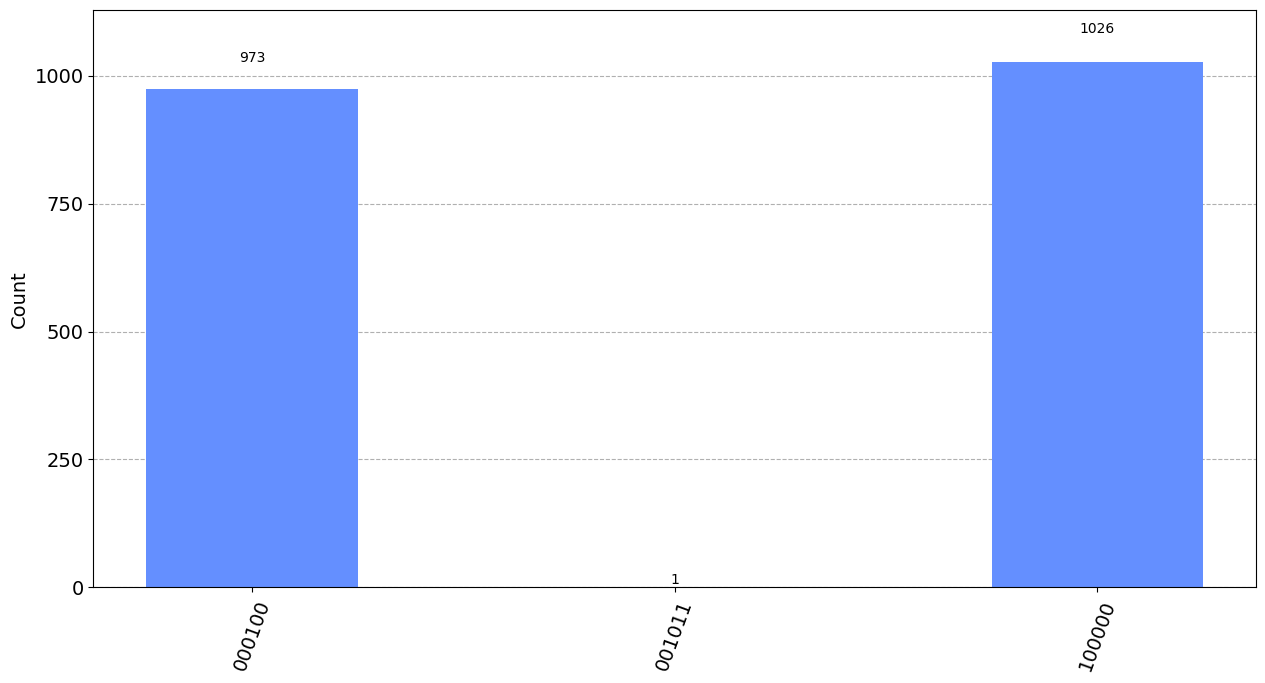

In [92]:
from qiskit import Aer, transpile, execute
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('qasm_simulator')

t_qc = transpile(grovercircuit, backend=backend, optimization_level=3)
job = execute(t_qc, backend=backend, shots=2000)
result = job.result()
counts = result.get_counts()


plot_histogram(counts, figsize=(15, 7.5))